# Explore here

In [34]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pickle import dump

In [3]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

In [4]:
output_folder = '../data/raw'
output_filepath = os.path.join(output_folder, 'housing.csv')

In [5]:
df_raw = pd.read_csv(url)

In [7]:
df_raw.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [8]:
df_raw.to_csv(output_filepath, index=False)

In [9]:
input_filepath = '../data/raw/housing.csv'

In [10]:
df = pd.read_csv(input_filepath)

In [11]:
df.shape

(20640, 9)

In [12]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
interesting_columns = ['MedInc', 'Latitude', 'Longitude']

In [16]:
df_filter = df[interesting_columns]

In [17]:
df_filter

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [19]:
X_train, X_test = train_test_split(df_filter, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
print(X_train_scaled.shape)
print(X_train.head())
print(X_test_scaled.shape)
print(X_test.head())

(16512, 3)
       MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80
(4128, 3)
       MedInc  Latitude  Longitude
20046  1.6812     36.06    -119.01
3024   2.5313     35.14    -119.46
15663  3.4801     37.80    -122.44
20484  5.7376     34.28    -118.72
9814   3.7250     36.62    -121.93


In [27]:
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train_scaled)

KMeans(n_clusters=6, random_state=42)

In [31]:
df_filter['cluster'] = model.fit_predict(df_filter)

C:\Users\jorge\AppData\Local\Temp\ipykernel_6484\186985495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['cluster'] = model.fit_predict(df_filter)


In [32]:
df_filter

,MedInc,Latitude,Longitude,cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,1
...,...,...,...,...
20635,1.5603,39.48,-121.09,1
20636,2.5568,39.49,-121.21,1
20637,1.7000,39.43,-121.22,1
20638,1.8672,39.43,-121.32,1


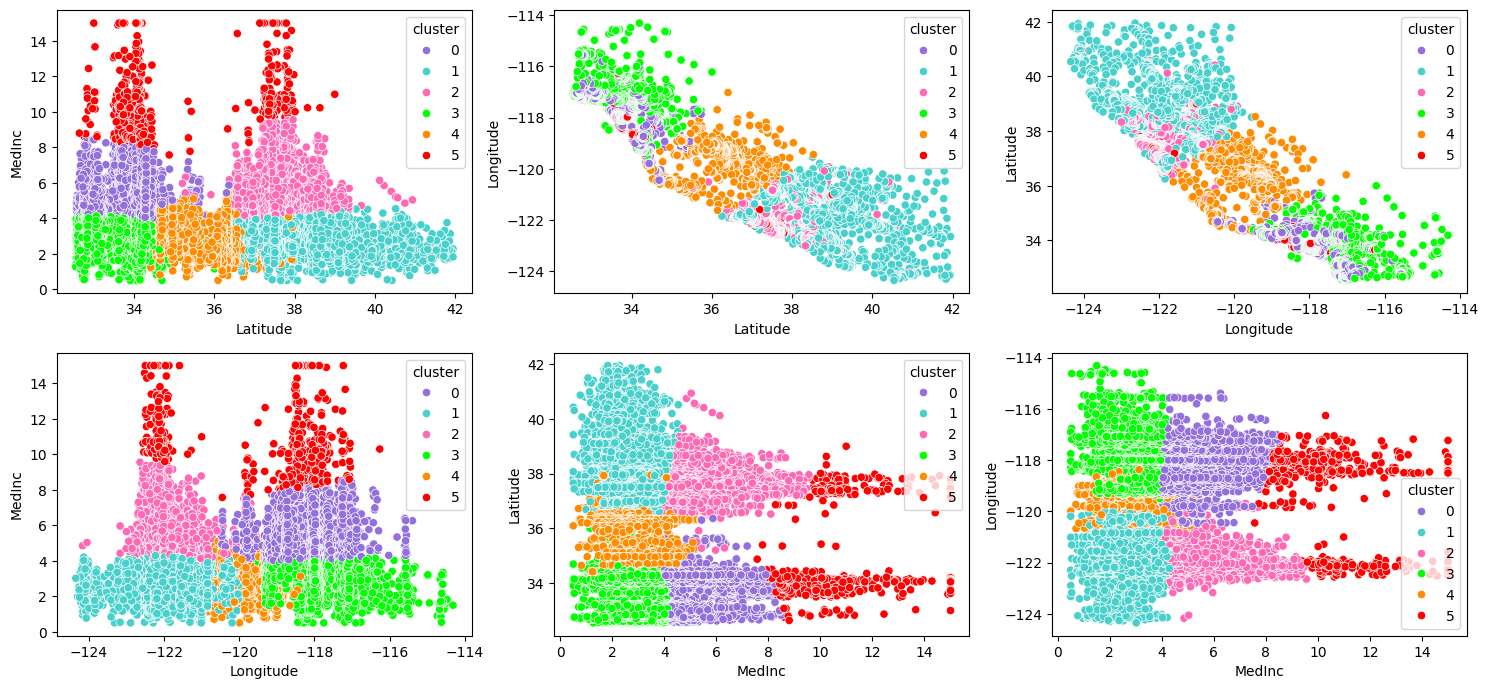

In [35]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = ["mediumpurple", "mediumturquoise", "hotpink", 'lime', 'darkorange', 'red']
sns.scatterplot(ax = axis[0, 0], data = df_filter, x = "Latitude", y = "MedInc", hue = "cluster", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = df_filter, x = "Latitude", y = "Longitude", hue = "cluster", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = df_filter, x = "Longitude", y = "Latitude", hue = "cluster", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = df_filter, x = "Longitude", y = "MedInc", hue = "cluster", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = df_filter, x = "MedInc", y = "Latitude", hue = "cluster", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = df_filter, x = "MedInc", y = "Longitude", hue = "cluster", palette = palette)

plt.tight_layout()

Primeras 5 filas del DataFrame combinado con la nueva columna 'cluster':
       MedInc  Latitude  Longitude  cluster
14196  3.2596     32.71    -117.03        3
8267   3.8125     33.77    -118.16        3
17445  4.1563     34.66    -120.48        1
14265  1.9425     32.69    -117.11        3
2271   3.5542     36.78    -119.80        5

Conteo de casas por cluster:
cluster
0    3031
1    4451
2     599
3    6818
4    1228
5    4513
Name: count, dtype: int64


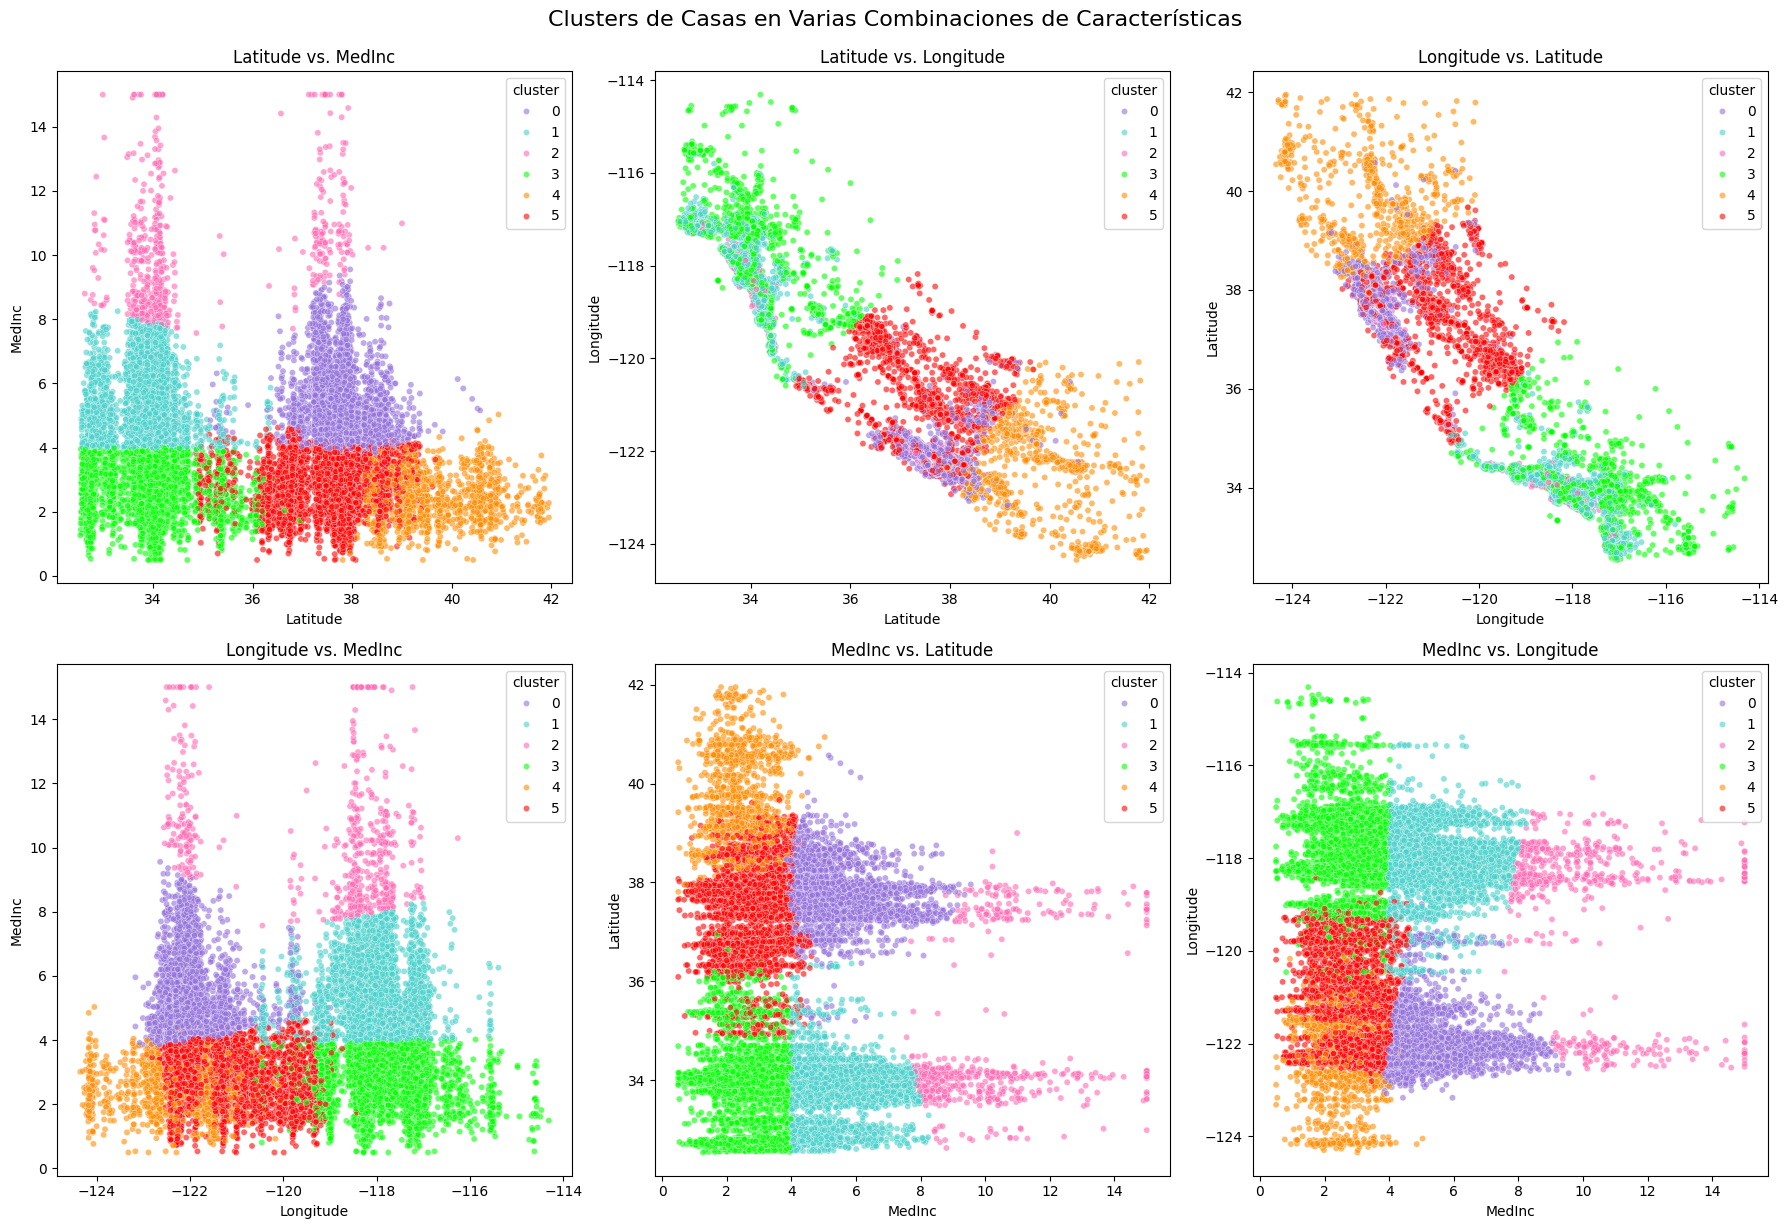

            MedInc   Latitude   Longitude
cluster                                  
0         5.371446  37.741188 -121.969492
1         5.212822  33.870103 -118.030216
2        10.327442  34.853890 -119.180417
3         2.724231  33.922334 -117.921282
4         2.402593  39.612875 -122.360472
5         2.813471  37.555438 -121.258952


In [40]:
train_clusters = model.fit_predict(X_train_scaled) 
test_clusters = model.predict(X_test_scaled)

df_train_with_clusters = X_train.copy()
df_train_with_clusters['cluster'] = train_clusters

df_test_with_clusters = X_test.copy()
df_test_with_clusters['cluster'] = test_clusters

df_combined_with_clusters = pd.concat([df_train_with_clusters, df_test_with_clusters])

print("Primeras 5 filas del DataFrame combinado con la nueva columna 'cluster':")
print(df_combined_with_clusters.head())
print("\nConteo de casas por cluster:")
print(df_combined_with_clusters['cluster'].value_counts().sort_index())

fig, axis = plt.subplots(2, 3, figsize = (18, 12)) 

palette = ["mediumpurple", "mediumturquoise", "hotpink", 'lime', 'darkorange', 'red'] 

sns.scatterplot(ax = axis[0, 0], data = df_combined_with_clusters, x = "Latitude", y = "MedInc", hue = "cluster", palette = palette, s=20, alpha=0.6)
axis[0, 0].set_title('Latitude vs. MedInc')

sns.scatterplot(ax = axis[0, 1], data = df_combined_with_clusters, x = "Latitude", y = "Longitude", hue = "cluster", palette = palette, s=20, alpha=0.6)
axis[0, 1].set_title('Latitude vs. Longitude')

sns.scatterplot(ax = axis[0, 2], data = df_combined_with_clusters, x = "Longitude", y = "Latitude", hue = "cluster", palette = palette, s=20, alpha=0.6)
axis[0, 2].set_title('Longitude vs. Latitude')

sns.scatterplot(ax = axis[1, 0], data = df_combined_with_clusters, x = "Longitude", y = "MedInc", hue = "cluster", palette = palette, s=20, alpha=0.6)
axis[1, 0].set_title('Longitude vs. MedInc')

sns.scatterplot(ax = axis[1, 1], data = df_combined_with_clusters, x = "MedInc", y = "Latitude", hue = "cluster", palette = palette, s=20, alpha=0.6)
axis[1, 1].set_title('MedInc vs. Latitude')

sns.scatterplot(ax = axis[1, 2], data = df_combined_with_clusters, x = "MedInc", y = "Longitude", hue = "cluster", palette = palette, s=20, alpha=0.6)
axis[1, 2].set_title('MedInc vs. Longitude')

plt.tight_layout()
plt.suptitle('Clusters de Casas en Varias Combinaciones de Características', y=1.02, fontsize=16) # Título general
plt.show()
print(df_combined_with_clusters.groupby('cluster')[interesting_columns].mean())